## Task 2.2: Descriptive Analytics - Geographical Demand Patterns

In [1]:
import pandas as pd
from datetime import timedelta
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("Boston_2017_Cleaned_Data.csv", index_col=0)
data

,start_time,end_time,start_station_id,end_station_id,start_station_name,end_station_name,bike_id,user_type
0,2017-01-01 00:06:58,2017-01-01 00:12:49,67,139,MIT at Mass Ave / Amherst St,Dana Park,644,Subscriber
1,2017-01-01 00:13:16,2017-01-01 00:28:07,36,10,Boston Public Library - 700 Boylston St.,B.U. Central - 725 Comm. Ave.,230,Subscriber
2,2017-01-01 00:16:17,2017-01-01 00:44:10,36,9,Boston Public Library - 700 Boylston St.,Agganis Arena - 925 Comm Ave.,980,Customer
3,2017-01-01 00:21:22,2017-01-01 00:33:50,46,19,Christian Science Plaza,Buswell St. at Park Dr.,1834,Subscriber
4,2017-01-01 00:30:06,2017-01-01 00:40:28,10,8,B.U. Central - 725 Comm. Ave.,Union Square - Brighton Ave. at Cambridge St.,230,Subscriber
...,...,...,...,...,...,...,...,...
1313769,2017-12-31 23:46:18,2017-12-31 23:50:27,117,141,Binney St / Sixth St,Kendall Street,1846,Subscriber
1313770,2017-12-29 16:11:56,2017-12-29 16:16:18,54,42,Tremont St at West St,Boylston St at Arlington St TEMPORARY WINTER L...,2,Subscriber
1313771,2017-12-30 08:09:44,2017-12-30 08:26:08,54,58,Tremont St at West St,Beacon St at Arlington St,1534,Subscriber
1313772,2017-12-30 12:20:01,2017-12-30 12:49:12,54,46,Tremont St at West St,Christian Science Plaza - Massachusetts Ave at...,1978,Subscriber


In [3]:
# Convert the start and end time to datetime
data['start_time'] = pd.to_datetime(data['start_time'])
data['end_time'] = pd.to_datetime(data['end_time'])

In [4]:
#Group by the start station ID, include only ID and name of the stations and use describe to get the number of rides.
#Then remove unnecessary columns and rename the column "top" to "station name"
groupedbyStartStation = data.groupby("start_station_id")['start_station_name'].describe()
groupedbyStartStation = groupedbyStartStation.sort_values(['count'], ascending=False)[["count", "top"]]  
groupedbyStartStation = groupedbyStartStation.rename({"top": "station_name"}, axis=1)
groupedbyStartStation

,count,station_name
start_station_id,,
67,42319,MIT at Mass Ave / Amherst St
22,27842,South Station - 700 Atlantic Ave
68,26415,Central Square at Mass Ave / Essex St
80,24532,MIT Stata Center at Vassar St / Main St
189,23910,Kendall T
...,...,...
181,198,Huron Ave. At Vassal Lane
203,165,Columbia Rd at Ceylon St
1,71,18 Dorrance Warehouse


In [5]:
#Do the the same priorly done with the start stations.
groupedbyEndStation = data.groupby("end_station_id")['end_station_name'].describe()
groupedbyEndStation = groupedbyEndStation.sort_values(['count'], ascending=False)[["count", "top"]]
groupedbyEndStation = groupedbyEndStation.rename({"top": "station_name"}, axis=1)
groupedbyEndStation

,count,station_name
end_station_id,,
67,42442,MIT at Mass Ave / Amherst St
80,33517,MIT Stata Center at Vassar St / Main St
22,26980,South Station - 700 Atlantic Ave
68,26231,Central Square at Mass Ave / Essex St
190,25851,Nashua Street at Red Auerbach Way
...,...,...
204,193,Walnut Ave at Warren St
181,185,Huron Ave. At Vassal Lane
203,160,Columbia Rd at Ceylon St


In [6]:
# Merge the start and end stations'data and remove duplicates. 
#Then consolidate the columns counting the rides from and towards a station in a new column and rename the station name column.
#At last, sort by the total number of rides per station.

freq = pd.merge(groupedbyStartStation, groupedbyEndStation, left_index=True, right_index=True)

freq = freq.drop("station_name_y", axis=1)

freq['total_count'] = freq.count_x+freq.count_y
freq = freq.drop(["count_x", "count_y"], axis=1)

freq = freq.rename({"station_name_x": "station_name"}, axis=1)

freq = freq.sort_values(['total_count'], ascending=False)

freq

,station_name,total_count
67,MIT at Mass Ave / Amherst St,84761
80,MIT Stata Center at Vassar St / Main St,58049
22,South Station - 700 Atlantic Ave,54822
68,Central Square at Mass Ave / Essex St,52646
189,Kendall T,46495
...,...,...
181,Huron Ave. At Vassal Lane,383
1,18 Dorrance Warehouse,336
203,Columbia Rd at Ceylon St,325
207,Faneuil St at Market St,98


In [7]:
#Display the n most and n least frequented stations.
freq.total_count = pd.to_numeric(freq.total_count)

n = 5

nLargest = freq.nlargest(n,'total_count')
nSmallest = freq.nsmallest(n,'total_count')

display(nLargest)
display(nSmallest)

,station_name,total_count
67,MIT at Mass Ave / Amherst St,84761
80,MIT Stata Center at Vassar St / Main St,58049
22,South Station - 700 Atlantic Ave,54822
68,Central Square at Mass Ave / Essex St,52646
189,Kendall T,46495


,station_name,total_count
232,Four Corners - 157 Washington St,5
207,Faneuil St at Market St,98
203,Columbia Rd at Ceylon St,325
1,18 Dorrance Warehouse,336
181,Huron Ave. At Vassal Lane,383


In [8]:
# Show all the rides that are related to the 5 least frequented stations

list_of_stations = []

for i in range(len(nSmallest)):
    list_of_stations.append(nSmallest.iloc[i, nSmallest.columns.get_loc('station_name')])
    
list_of_stations
    
col1 = "start_station_name"
query1 = "{} in @list_of_stations".format(col1)
col2 = "end_station_name"
query2 = "{} in @list_of_stations".format(col2)

query = query1+"|"+query2

display(data.query(query))


,start_time,end_time,start_station_id,end_station_id,start_station_name,end_station_name,bike_id,user_type
3984,2017-01-05 10:26:08,2017-01-05 10:57:23,143,1,EF - North Point Park,18 Dorrance Warehouse,576,Subscriber
5421,2017-01-06 17:49:41,2017-01-10 13:54:38,151,1,John F Fitzgerald - Surface Road at India Street,18 Dorrance Warehouse,1088,Subscriber
6874,2017-01-11 09:41:39,2017-01-11 10:07:10,118,1,Linear Park - Mass. Ave. at Cameron Ave.,18 Dorrance Warehouse,1380,Subscriber
8524,2017-01-13 11:23:18,2017-01-13 12:12:09,74,1,Harvard Square at Mass Ave/ Dunster,18 Dorrance Warehouse,1104,Subscriber
13452,2017-01-22 07:03:43,2017-02-02 10:13:57,67,1,MIT at Mass Ave / Amherst St,18 Dorrance Warehouse,1096,Customer
...,...,...,...,...,...,...,...,...
1312666,2017-12-28 10:09:48,2017-12-28 10:42:33,181,16,Huron Ave. At Vassal Lane,Back Bay T Stop - Dartmouth St at Stuart St,1084,Customer
1312720,2017-12-28 12:25:48,2017-12-28 12:37:50,70,181,Harvard Kennedy School at Bennett St / Eliot St,Huron Ave. At Vassal Lane,623,Subscriber
1312959,2017-12-28 23:22:11,2017-12-29 00:07:37,8,207,Union Square - Brighton Ave at Cambridge St,Faneuil St at Market St,1791,Subscriber
1313258,2017-12-29 16:43:56,2017-12-29 17:17:37,16,181,Back Bay T Stop - Dartmouth St at Stuart St,Huron Ave. At Vassal Lane,1118,Customer


In [9]:
#Search for a certain key words in the names of start and end stations.
lookup = 'Faneuil'

display([i for i in data.start_station_name if lookup in i])
display([i for i in data.end_station_name if lookup in i])

['Faneuil Hall - Union St. at North St.',
 'Faneuil Hall - Union St. at North St.',
 'Faneuil Hall - Union St. at North St.',
 'Faneuil Hall - Union St. at North St.',
 'Faneuil Hall - Union St. at North St.',
 'Faneuil Hall - Union St. at North St.',
 'Faneuil Hall - Union St. at North St.',
 'Faneuil Hall - Union St. at North St.',
 'Faneuil Hall - Union St. at North St.',
 'Faneuil Hall - Union St. at North St.',
 'Faneuil Hall - Union St. at North St.',
 'Faneuil Hall - Union St. at North St.',
 'Faneuil Hall - Union St. at North St.',
 'Faneuil Hall - Union St. at North St.',
 'Faneuil Hall - Union St. at North St.',
 'Faneuil Hall - Union St. at North St.',
 'Faneuil Hall - Union St. at North St.',
 'Faneuil Hall - Union St. at North St.',
 'Faneuil Hall - Union St. at North St.',
 'Faneuil Hall - Union St. at North St.',
 'Faneuil Hall - Union St. at North St.',
 'Faneuil Hall - Union St. at North St.',
 'Faneuil St at Market St',
 'Faneuil St at Market St',
 'Faneuil St at Mark

['Faneuil Hall - Union St. at North St.',
 'Faneuil Hall - Union St. at North St.',
 'Faneuil Hall - Union St. at North St.',
 'Faneuil Hall - Union St. at North St.',
 'Faneuil Hall - Union St. at North St.',
 'Faneuil Hall - Union St. at North St.',
 'Faneuil Hall - Union St. at North St.',
 'Market St at Faneuil St',
 'Faneuil Hall - Union St. at North St.',
 'Faneuil Hall - Union St. at North St.',
 'Faneuil Hall - Union St. at North St.',
 'Faneuil Hall - Union St. at North St.',
 'Faneuil Hall - Union St. at North St.',
 'Faneuil Hall - Union St. at North St.',
 'Faneuil Hall - Union St. at North St.',
 'Faneuil Hall - Union St. at North St.',
 'Faneuil Hall - Union St. at North St.',
 'Faneuil Hall - Union St. at North St.',
 'Faneuil Hall - Union St. at North St.',
 'Faneuil Hall - Union St. at North St.',
 'Faneuil Hall - Union St. at North St.',
 'Faneuil Hall - Union St. at North St.',
 'Faneuil Hall - Union St. at North St.',
 'Faneuil Hall - Union St. at North St.',
 'Fane

In [10]:
# Save the total number of rides per station in a csv file to be able to create a heat map.
freq.to_csv('rides_per_station_2017.csv')

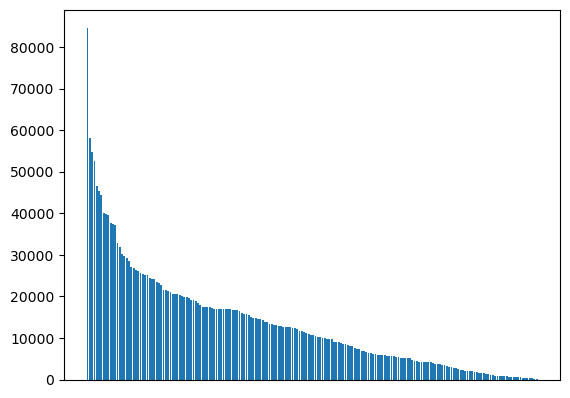

In [11]:
#Visualize the total ride numbers from the step before.
plt.bar(freq["station_name"], freq["total_count"])
f = plt.gca()
f.axes.get_xaxis().set_visible(False)

In [12]:
# Identify popular routes through grouping be the station names and order by the number of rides counted.
routes = data.groupby(["start_station_name", "end_station_name"]).size().reset_index().rename(columns={0: 'count'})
routes = routes.sort_values(["count"], ascending=False)
routes.head(20)

,start_station_name,end_station_name,count
2145,Beacon St at Massachusetts Ave,MIT at Mass Ave / Amherst St,4783
17163,MIT at Mass Ave / Amherst St,Beacon St at Massachusetts Ave,4349
17091,MIT Vassar St,MIT Stata Center at Vassar St / Main St,3876
17265,MIT at Mass Ave / Amherst St,MIT Vassar St,3732
17093,MIT Vassar St,MIT at Mass Ave / Amherst St,3274
16732,MIT Pacific St at Purrington St,MIT Stata Center at Vassar St / Main St,3035
16919,MIT Stata Center at Vassar St / Main St,MIT Vassar St,2649
16074,Linear Park - Mass. Ave. at Cameron Ave.,Davis Square,2462
10133,Davis Square,Linear Park - Mass. Ave. at Cameron Ave.,2347
16917,MIT Stata Center at Vassar St / Main St,MIT Pacific St at Purrington St,2303


In [13]:
#Create a column containing information on whether start and end station are the same and inserting the trip duration by subtracting the start time from the end time.
df = pd.DataFrame({'same_start_and_end': data["end_station_id"] == data["start_station_id"], 'trip_duration': data["end_time"]-data["start_time"]})
df.groupby("same_start_and_end").describe()

trip_duration                             \
                           count                       mean   
same_start_and_end                                            
False                    1272743  0 days 00:17:35.892954822   
True                       40971  0 days 00:59:48.946230260   

                                                                \
                                          std              min   
same_start_and_end                                               
False               0 days 03:33:28.067264526  0 days 00:01:01   
True                0 days 05:17:31.030689860  0 days 00:01:01   

                                                                       \
                                25%              50%              75%   
same_start_and_end                                                      
False               0 days 00:06:33  0 days 00:10:47  0 days 00:17:30   
True                0 days 00:09:53  0 days 00:23:43  0 days 00:53:53   

                                      
                                 max  
same_start_and_end                    
False               48 days 08:40:21  
True                26 days 14:34:32